[いろいろな銘柄のアノマリーを調べる](https://note.com/hippen/n/n8587a3584766)


<ipython-input-8-9e3ffd3998e4>:32: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_tmp=data_stock[year_s].copy()
<ipython-input-8-9e3ffd3998e4>:39: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_tmp2=data_stock[str(i)].copy()
<ipython-input-8-9e3ffd3998e4>:73: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_date=data_stock[year_e].copy()


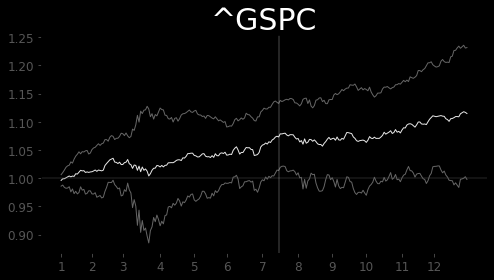

In [8]:
import yfinance as yf
import pandas as pd
from datetime import datetime as dt
import datetime
from matplotlib import dates
import matplotlib.pyplot as plt
%matplotlib inline

# データ取得期間設定
year_s="2011"
year_e="2021"
start = year_s+'-01-01'
end = datetime.date.today().strftime("%Y-%m-%d")

# 銘柄の指定 S&P500,NASDAQ,Nikkei225
codelist=['^GSPC']
# codelist = ['^GSPC','^IXIC','^N225',
# # 半導体関連
# 'SMH',"SOXX",
# # 10Y金利,債券,ドルインデックス,ドル円
# "^TNX","TLT","DX=F","USDJPY=X",
# # ゴールド,銅,原油 
# "GC=F","HG=F","CL=F"]

for i in range(len(codelist)):
 ticker=codelist[i]
 
 # 株価データ取得
# data_stock = pd.DataFrame(yf.download(ticker, start=start, end=end)["Adj Close"])

 # 株価を年で分割（開始処理）
 df_tmp=data_stock[year_s].copy()
 df_tmp.rename(columns={'Adj Close': year_s },inplace=True)
 df_tmp=df_tmp.reset_index()
 df_tmp=df_tmp.drop("Date",axis=1)

 # 株価を年で分割（繰り返し処理）
 for i in range(int(year_s)+1,int(year_e)):
   df_tmp2=data_stock[str(i)].copy()
   df_tmp2.rename(columns={'Adj Close': i },inplace=True)
   df_tmp2=df_tmp2.reset_index()
   df_tmp2=df_tmp2.drop("Date",axis=1)
   df_tmp=df_tmp.join(df_tmp2)

 # 株価を増加率に変換
 df_tmp=(1+df_tmp.pct_change()).cumprod()

# 経過日毎に10年間の中央値を計算
# df_st=df_tmp.dropna().median(axis=1)
 # 経過日毎に10年間の平均値で計算したい場合
 df_mean=df_tmp.dropna().mean(axis=1)
 df_std=df_tmp.dropna().std(axis=1)


 fig, ax1 = plt.subplots(figsize=(8,4))
 fig.patch.set_facecolor('black') 
 ax1.patch.set_facecolor('black') 

 # グラフ作成と光沢感を出す繰り返し処理
 ax1.plot(df_mean,color="white",alpha=0.9,linewidth=1)    
 ax1.plot(df_mean+df_std,color="white",alpha=0.4,linewidth=1)    
 ax1.plot(df_mean-df_std,color="white",alpha=0.4,linewidth=1)    
 ax1.plot(df_mean,color="white",alpha=0.9,linewidth=1)    
   
    
 
 # グラフ関連処理
 plt.title(ticker, color="white",fontsize=30)
 ax1.tick_params(axis='x', colors='#565656',labelsize=12)
 ax1.tick_params(axis='y', colors='#565656',labelsize=12)
 ax1.axhline(y=1,color="#565656",alpha=0.3)

 ##本日の日付（年初来の営業日数を計算し縦線を引く処理）
 df_date=data_stock[year_e].copy()
 ax1.axvline(x=len(df_date),color="white",alpha=0.2) 
 
 ##年初来の営業日数###
 ax1.set_xticks([1,20,39,62,83,103,125,147,168,189,211,231])
 ##月をメモリに設定###
 ax1.set_xticklabels(["1","2","3","4","5","6","7","8","9","10","11","12"])
 
 plt.show()
 plt.close()